In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('rumah123.csv')

# **Data Understanding**

In [3]:
data = pd.DataFrame(data)
print (data.shape)

(3980, 13)


In [4]:
data = data.drop(columns=['link', 'nomor_telepon'])
print(data.shape)

(3980, 11)


In [5]:
print (data.dtypes)

judul                object
harga                object
lokasi               object
kamar_tidur         float64
kamar_mandi         float64
luas_tanah           object
luas_bangunan        object
jumlah_garasi       float64
daya_watt            object
jumlah_lantai       float64
sertifikat_rumah     object
dtype: object


In [6]:
print(data.isnull().sum())

judul                 0
harga                 0
lokasi                0
kamar_tidur          86
kamar_mandi          74
luas_tanah            1
luas_bangunan         3
jumlah_garasi       914
daya_watt            35
jumlah_lantai       231
sertifikat_rumah     18
dtype: int64


In [7]:
data.head(10)

,judul,harga,lokasi,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,jumlah_garasi,daya_watt,jumlah_lantai,sertifikat_rumah
0,Rumah Cantik 2 Lantai Murah Perumahan Seberang...,Rp 795 Juta,"Rungkut, Surabaya",3.0,2.0,50 m²,70 m²,2.0,1300 watt,2.0,SHM
1,Murah Rumah Luas Di Graha Kencana Row Jalan Le...,"Rp 2,5 Miliar","Blimbing, Malang",4.0,3.0,232 m²,190 m²,1.0,4400 watt,2.0,SHM
2,Murah Langka Ready Di Citraland Puncak Tidar H...,"Rp 2,8 Miliar","Villa Puncak Tidar, Malang",2.0,3.0,135 m²,150 m²,2.0,4400 watt,2.0,HGB
3,Murah Rumah Luas Tengah Kota Malang Strategis ...,Rp 4 Miliar,"Klojen, Malang",5.0,6.0,626 m²,400 m²,2.0,4400 watt,2.0,SHM
4,Murah Mewah Di Perumahan Elite Araya Golf Mala...,"Rp 2,8 Miliar","Araya, Malang",5.0,4.0,240 m²,400 m²,2.0,2200 watt,2.0,SHM
5,Baru Gress Mewah Minimalis Dekat Suhat Univ Br...,"Rp 3,28 Miliar","Lowokwaru, Malang",4.0,3.0,140 m²,144 m²,1.0,2200 watt,2.0,HGB
6,Jual Rumah Minimalis Siap Huni Dekat Mall & Rs,"Rp 1,2 Miliar","Wiyung, Surabaya",4.0,2.0,108 m²,102 m²,1.0,2200 watt,2.0,SHM
7,"Rp 2,91 Miliar - 3,24 Miliar Wisata Bukit Mas ...","Rp 2,91 Miliar","Rp 2, 91 Miliar - 3",NaN,NaN,96 m²,96 m²,NaN,NaN,NaN,NaN
8,Rumah Di Pakuwon Indah Imperial Golf,"Rp 7,25 Miliar","Pakuwon Indah, Surabaya",NaN,NaN,330 m²,330 m²,NaN,Lainnya,1.0,SHM
9,Perumahan Jember Subsidi Terlaris Viral Grand ...,Rp 166 Juta,"Sumbersari, Jember",2.0,1.0,66 m²,27 m²,1.0,Lainnya,1.0,HGB


In [8]:
data = data[~data['daya_watt'].str.lower().eq('lainnya')]

In [9]:
data = pd.DataFrame(data)
print (data.shape)

(2124, 11)


In [10]:
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 264


In [11]:
data = data.drop_duplicates(keep='first')

In [12]:
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 0


In [13]:
data = pd.DataFrame(data)
print (data.shape)

(1860, 11)


In [14]:
print(data.isnull().sum())

judul                 0
harga                 0
lokasi                0
kamar_tidur          24
kamar_mandi          20
luas_tanah            1
luas_bangunan         1
jumlah_garasi       321
daya_watt            27
jumlah_lantai       123
sertifikat_rumah     12
dtype: int64


In [15]:
data = data.dropna()

In [16]:
print(data.isnull().sum())

judul               0
harga               0
lokasi              0
kamar_tidur         0
kamar_mandi         0
luas_tanah          0
luas_bangunan       0
jumlah_garasi       0
daya_watt           0
jumlah_lantai       0
sertifikat_rumah    0
dtype: int64


In [17]:
import re
import pandas as pd
import numpy as np

# ---------- 1) Harga ----------
def clean_price_in_place(harga_str):
    if pd.isna(harga_str):
        return np.nan

    harga_str = str(harga_str)

    # Determine multiplier
    multiplier = 1
    if "Miliar" in harga_str:
        multiplier = 1_000_000_000
    elif "Juta" in harga_str:
        multiplier = 1_000_000

    # Extract raw number string
    num_match = re.findall(r"[\d.,]+", harga_str)
    if not num_match:
        return np.nan

    num = num_match[0]

    # Clean number format (remove thousand separators if mixed, replace comma with dot for decimal)
    if "." in num and "," in num:
        num = num.replace(".", "")
    num = num.replace(",", ".")

    try:
        value = float(num) * multiplier
        return int(value)
    except:
        return np.nan


data["harga"] = data["harga"].apply(clean_price_in_place)
data['harga'] = data['harga'].astype(int)


In [18]:
# ---------- 2) Kamar tidur & mandi ----------
def clean_room_counts(df, tidur_col="kamar_tidur", mandi_col="kamar_mandi", inplace=False):
    target = df if inplace else df.copy()
    target[tidur_col] = pd.to_numeric(target[tidur_col], errors="coerce")
    target[mandi_col] = pd.to_numeric(target[mandi_col], errors="coerce")
    return target

In [19]:
# ---------- 3) Luas tanah & bangunan ----------
def clean_m2_in_place(m2_str):
    if pd.isna(m2_str):
        return np.nan
    m2_str = str(m2_str).lower().replace("m²", "").replace("m2", "").strip()
    # Remove non-digit and non-decimal characters, then convert to float
    m2_str = re.sub(r"[^\d.]", "", m2_str)
    if m2_str == "":
        return np.nan
    try:
        return float(m2_str)
    except:
        return np.nan

data["luas_tanah"] = data["luas_tanah"].apply(clean_m2_in_place)
data["luas_bangunan"] = data["luas_bangunan"].apply(clean_m2_in_place)

In [20]:
# ---------- 4) Daya watt ----------
def clean_daya_watt_in_place(watt_str):
    if pd.isna(watt_str):
        return np.nan
    watt_str = str(watt_str).lower().replace("watt", "").strip()
    if watt_str == "lainnya" or not watt_str.replace(".", "").isdigit():
        return np.nan # Convert non-numeric/unknown to NaN
    try:
        return float(watt_str)
    except:
        return np.nan

data["daya_watt"] = data["daya_watt"].apply(clean_daya_watt_in_place)

In [21]:
# ---------- 5) Jumlah garasi & lantai ----------
data["jumlah_garasi"] = pd.to_numeric(data["jumlah_garasi"], errors="coerce")
data["jumlah_lantai"] = pd.to_numeric(data["jumlah_lantai"], errors="coerce")

In [22]:
# ---------- 6) Nama Kota ----------
data["kota"] = data["lokasi"].apply(lambda x: x.split(",")[-1].strip())


In [23]:
data.head(2617)

,judul,harga,lokasi,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,jumlah_garasi,daya_watt,jumlah_lantai,sertifikat_rumah,kota
0,Rumah Cantik 2 Lantai Murah Perumahan Seberang...,795000000,"Rungkut, Surabaya",3.0,2.0,50.0,70.0,2.0,1300.0,2.0,SHM,Surabaya
1,Murah Rumah Luas Di Graha Kencana Row Jalan Le...,2500000000,"Blimbing, Malang",4.0,3.0,232.0,190.0,1.0,4400.0,2.0,SHM,Malang
2,Murah Langka Ready Di Citraland Puncak Tidar H...,2800000000,"Villa Puncak Tidar, Malang",2.0,3.0,135.0,150.0,2.0,4400.0,2.0,HGB,Malang
3,Murah Rumah Luas Tengah Kota Malang Strategis ...,4000000000,"Klojen, Malang",5.0,6.0,626.0,400.0,2.0,4400.0,2.0,SHM,Malang
4,Murah Mewah Di Perumahan Elite Araya Golf Mala...,2800000000,"Araya, Malang",5.0,4.0,240.0,400.0,2.0,2200.0,2.0,SHM,Malang
...,...,...,...,...,...,...,...,...,...,...,...,...
3975,"Rumah Bangunan Baru, Daerah Sukarno Hatta, Lin...",1200000000,"Soekarno Hatta, Malang",2.0,1.0,90.0,45.0,1.0,1300.0,1.0,SHM,Malang
3976,"Rumah Stategis, Nol Jalan, Lokasi Ki Ageng Gri...",2000000000,"Sawojajar, Malang",3.0,2.0,190.0,120.0,1.0,2200.0,1.0,SHM,Malang
3977,Rumah Hook Luas 731 Di Perumahan Elit Graha Fa...,23500000000,"Dukuh Pakis, Surabaya",5.0,5.0,731.0,1000.0,2.0,10600.0,2.0,SHM,Surabaya
3978,Rumah Siap Huni 1 Lantai Wiguna Selatan Rungku...,950000000,"Rungkut, Surabaya",2.0,1.0,90.0,60.0,1.0,1300.0,1.0,SHM,Surabaya


In [24]:
print (data.dtypes)

judul                object
harga                 int64
lokasi               object
kamar_tidur         float64
kamar_mandi         float64
luas_tanah          float64
luas_bangunan       float64
jumlah_garasi       float64
daya_watt           float64
jumlah_lantai       float64
sertifikat_rumah     object
kota                 object
dtype: object


In [25]:
float_cols_to_int = [
    "kamar_tidur",
    "kamar_mandi",
    "luas_tanah",
    "luas_bangunan",
    "jumlah_garasi",
    "daya_watt",
    "jumlah_lantai"
]

for col in float_cols_to_int:
    data[col] = data[col].astype(int)

print("Tipe data kolom numerik telah diubah menjadi integer.")
print(data.dtypes)

Tipe data kolom numerik telah diubah menjadi integer.
judul               object
harga                int64
lokasi              object
kamar_tidur          int64
kamar_mandi          int64
luas_tanah           int64
luas_bangunan        int64
jumlah_garasi        int64
daya_watt            int64
jumlah_lantai        int64
sertifikat_rumah    object
kota                object
dtype: object


In [26]:
print("Jenis jumlah kamar tidur:", data['kamar_tidur'].unique())
print("\nTotal kategori kamar tidur:", data['kamar_tidur'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['kamar_tidur'].value_counts().sort_index())


Jenis jumlah kamar tidur: [ 3  4  2  5  6 24 14 18  8 12 10  1  7 25 22  9 15 20 16 11 17]

Total kategori kamar tidur: 21

Frekuensi tiap kategori:
kamar_tidur
1      17
2     423
3     430
4     319
5     150
6      57
7      21
8      11
9       7
10      4
11      4
12      3
14      2
15      1
16      4
17      1
18      3
20      1
22      1
24      1
25      3
Name: count, dtype: int64


In [27]:
print("Jenis jumlah kamar mandi:", data['kamar_mandi'].unique())
print("\nTotal kategori kamar mandi:", data['kamar_mandi'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['kamar_mandi'].value_counts().sort_index())


Jenis jumlah kamar mandi: [ 2  3  6  4  1  5 16 19  8 10  7 15 14 11 12]

Total kategori kamar mandi: 15

Frekuensi tiap kategori:
kamar_mandi
1     342
2     457
3     367
4     167
5      64
6      29
7      11
8      10
10      2
11      1
12      2
14      3
15      3
16      3
19      2
Name: count, dtype: int64


In [28]:
print("Jenis jumlah garasi :", data['jumlah_garasi'].unique())
print("\nTotal kategori kamar tidur:", data['jumlah_garasi'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['jumlah_garasi'].value_counts().sort_index())


Jenis jumlah garasi : [ 2  1  4  5  3 15  8 10  6 11]

Total kategori kamar tidur: 10

Frekuensi tiap kategori:
jumlah_garasi
1     923
2     459
3      32
4      25
5      11
6       5
8       4
10      2
11      1
15      1
Name: count, dtype: int64


In [29]:
print("Jenis jumlah lantai :", data['jumlah_lantai'].unique())
print("\nTotal kategori kamar tidur:", data['jumlah_lantai'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['jumlah_lantai'].value_counts().sort_index())


Jenis jumlah lantai : [2 1 3 5 4]

Total kategori kamar tidur: 5

Frekuensi tiap kategori:
jumlah_lantai
1    564
2    825
3     58
4      3
5     13
Name: count, dtype: int64


In [30]:
print("Jenis jumlah sertifikat:", data['sertifikat_rumah'].unique())
print("\nTotal kategori kamar tidur:", data['sertifikat_rumah'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['sertifikat_rumah'].value_counts().sort_index())


Jenis jumlah sertifikat: ['SHM' 'HGB' 'Lainnya' 'PPJB' 'Hak Pakai']

Total kategori kamar tidur: 5

Frekuensi tiap kategori:
sertifikat_rumah
HGB           230
Hak Pakai       1
Lainnya        27
PPJB           15
SHM          1190
Name: count, dtype: int64


In [31]:
print("Jenis jumlah kota:", data['kota'].unique())
print("\nTotal kategori kota :", data['kota'].nunique())
print("\nFrekuensi tiap kategori:")
print(data['kota'].value_counts().sort_index())


Jenis jumlah kota: ['Surabaya' 'Malang' 'Sidoarjo' 'Jember' 'Gresik' 'Mojokerto' 'Pasuruan'
 'Batu' 'Nganjuk' 'Lumajang' 'Kediri' 'Tuban' 'Banyuwangi' 'Madiun'
 'Tulungagung' 'Pamekasan' 'Trenggalek' 'Situbondo' 'Probolinggo']

Total kategori kota : 19

Frekuensi tiap kategori:
kota
Banyuwangi       1
Batu            14
Gresik          39
Jember           4
Kediri           6
Lumajang         1
Madiun           2
Malang         376
Mojokerto        5
Nganjuk          2
Pamekasan        1
Pasuruan         7
Probolinggo      1
Sidoarjo       177
Situbondo        1
Surabaya       822
Trenggalek       1
Tuban            1
Tulungagung      2
Name: count, dtype: int64


In [32]:
# Drop kota yang mengandung angka atau kata harga
pattern = r'\d|juta|miliar|rp'

data = data[~data['kota'].str.lower().str.contains(pattern)]


In [33]:
cols = ['kamar_tidur', 'kamar_mandi', 'jumlah_garasi', 'jumlah_lantai']

for col in cols:
    unique_vals = sorted(data[col].dropna().unique().tolist())  # convert to list
    print(f"🔹 {col.upper()}")
    print(f"   ▪ Unique values     : {unique_vals}")
    print(f"   ▪ Total categories  : {len(unique_vals)}")
    print("-" * 60)


🔹 KAMAR_TIDUR
   ▪ Unique values     : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 24, 25]
   ▪ Total categories  : 21
------------------------------------------------------------
🔹 KAMAR_MANDI
   ▪ Unique values     : [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 19]
   ▪ Total categories  : 15
------------------------------------------------------------
🔹 JUMLAH_GARASI
   ▪ Unique values     : [1, 2, 3, 4, 5, 6, 8, 10, 11, 15]
   ▪ Total categories  : 10
------------------------------------------------------------
🔹 JUMLAH_LANTAI
   ▪ Unique values     : [1, 2, 3, 4, 5]
   ▪ Total categories  : 5
------------------------------------------------------------


In [34]:
cols = ['kamar_tidur', 'kamar_mandi', 'jumlah_garasi', 'jumlah_lantai']

summary = {}

for col in cols:
    summary[col] = data[col].value_counts().sort_index()

# Tampilkan ringkasan
for col, freq in summary.items():
    print(f"\n📌 {col.upper()}")
    print(freq)



📌 KAMAR_TIDUR
kamar_tidur
1      17
2     423
3     430
4     319
5     150
6      57
7      21
8      11
9       7
10      4
11      4
12      3
14      2
15      1
16      4
17      1
18      3
20      1
22      1
24      1
25      3
Name: count, dtype: int64

📌 KAMAR_MANDI
kamar_mandi
1     342
2     457
3     367
4     167
5      64
6      29
7      11
8      10
10      2
11      1
12      2
14      3
15      3
16      3
19      2
Name: count, dtype: int64

📌 JUMLAH_GARASI
jumlah_garasi
1     923
2     459
3      32
4      25
5      11
6       5
8       4
10      2
11      1
15      1
Name: count, dtype: int64

📌 JUMLAH_LANTAI
jumlah_lantai
1    564
2    825
3     58
4      3
5     13
Name: count, dtype: int64


In [35]:
# Encoding : One Hot Encoding Kota & Sertifikat
data = pd.get_dummies(
    data,
    columns=["sertifikat_rumah", "kota"],
    prefix=["sertifikat", "kota"],
    drop_first=True,
    dtype=int
)


In [36]:
data

,judul,harga,lokasi,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,jumlah_garasi,daya_watt,jumlah_lantai,...,kota_Nganjuk,kota_Pamekasan,kota_Pasuruan,kota_Probolinggo,kota_Sidoarjo,kota_Situbondo,kota_Surabaya,kota_Trenggalek,kota_Tuban,kota_Tulungagung
0,Rumah Cantik 2 Lantai Murah Perumahan Seberang...,795000000,"Rungkut, Surabaya",3,2,50,70,2,1300,2,...,0,0,0,0,0,0,1,0,0,0
1,Murah Rumah Luas Di Graha Kencana Row Jalan Le...,2500000000,"Blimbing, Malang",4,3,232,190,1,4400,2,...,0,0,0,0,0,0,0,0,0,0
2,Murah Langka Ready Di Citraland Puncak Tidar H...,2800000000,"Villa Puncak Tidar, Malang",2,3,135,150,2,4400,2,...,0,0,0,0,0,0,0,0,0,0
3,Murah Rumah Luas Tengah Kota Malang Strategis ...,4000000000,"Klojen, Malang",5,6,626,400,2,4400,2,...,0,0,0,0,0,0,0,0,0,0
4,Murah Mewah Di Perumahan Elite Araya Golf Mala...,2800000000,"Araya, Malang",5,4,240,400,2,2200,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,"Rumah Bangunan Baru, Daerah Sukarno Hatta, Lin...",1200000000,"Soekarno Hatta, Malang",2,1,90,45,1,1300,1,...,0,0,0,0,0,0,0,0,0,0
3976,"Rumah Stategis, Nol Jalan, Lokasi Ki Ageng Gri...",2000000000,"Sawojajar, Malang",3,2,190,120,1,2200,1,...,0,0,0,0,0,0,0,0,0,0
3977,Rumah Hook Luas 731 Di Perumahan Elit Graha Fa...,23500000000,"Dukuh Pakis, Surabaya",5,5,731,1000,2,10600,2,...,0,0,0,0,0,0,1,0,0,0
3978,Rumah Siap Huni 1 Lantai Wiguna Selatan Rungku...,950000000,"Rungkut, Surabaya",2,1,90,60,1,1300,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
print (data.dtypes)
print(data.shape)

judul                   object
harga                    int64
lokasi                  object
kamar_tidur              int64
kamar_mandi              int64
luas_tanah               int64
luas_bangunan            int64
jumlah_garasi            int64
daya_watt                int64
jumlah_lantai            int64
sertifikat_Hak Pakai     int64
sertifikat_Lainnya       int64
sertifikat_PPJB          int64
sertifikat_SHM           int64
kota_Batu                int64
kota_Gresik              int64
kota_Jember              int64
kota_Kediri              int64
kota_Lumajang            int64
kota_Madiun              int64
kota_Malang              int64
kota_Mojokerto           int64
kota_Nganjuk             int64
kota_Pamekasan           int64
kota_Pasuruan            int64
kota_Probolinggo         int64
kota_Sidoarjo            int64
kota_Situbondo           int64
kota_Surabaya            int64
kota_Trenggalek          int64
kota_Tuban               int64
kota_Tulungagung         int64
dtype: o

In [38]:
data.describe()


,harga,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,jumlah_garasi,daya_watt,jumlah_lantai,sertifikat_Hak Pakai,sertifikat_Lainnya,...,kota_Nganjuk,kota_Pamekasan,kota_Pasuruan,kota_Probolinggo,kota_Sidoarjo,kota_Situbondo,kota_Surabaya,kota_Trenggalek,kota_Tuban,kota_Tulungagung
count,1.463000e+03,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,...,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,3.811326e+09,3.593985,2.668489,214.966507,220.031442,1.503759,3275.803144,1.684894,0.000684,0.018455,...,0.001367,0.000684,0.004785,0.000684,0.120984,0.000684,0.561859,0.000684,0.000684,0.001367
std,7.091598e+09,2.255989,1.833011,345.969728,271.955766,0.977073,3339.487091,0.643677,0.026144,0.134637,...,0.036961,0.026144,0.069029,0.026144,0.326221,0.026144,0.496328,0.026144,0.026144,0.036961
min,1.000000e+00,1.000000,1.000000,18.000000,15.000000,1.000000,450.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.425000e+08,2.000000,2.000000,84.000000,73.500000,1.000000,1300.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.700000e+09,3.000000,2.000000,127.000000,140.000000,1.000000,2200.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.770000e+09,4.000000,3.000000,240.000000,270.000000,2.000000,4400.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000e+11,25.000000,19.000000,9951.000000,5500.000000,15.000000,47500.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


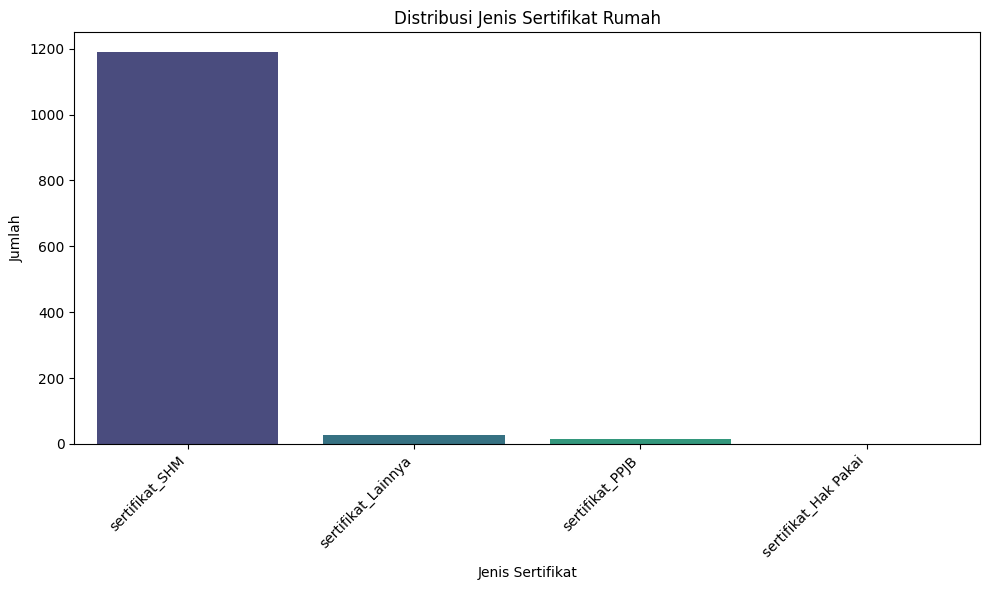

In [39]:
plt.figure(figsize=(10, 6))

sertifikat_cols = [col for col in data.columns if col.startswith('sertifikat_')]
sertifikat_counts = data[sertifikat_cols].sum().sort_values(ascending=False)

sns.barplot(x=sertifikat_counts.index, y=sertifikat_counts.values, palette='viridis', hue=sertifikat_counts.index, legend=False)
plt.title("Distribusi Jenis Sertifikat Rumah")
plt.xlabel("Jenis Sertifikat")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

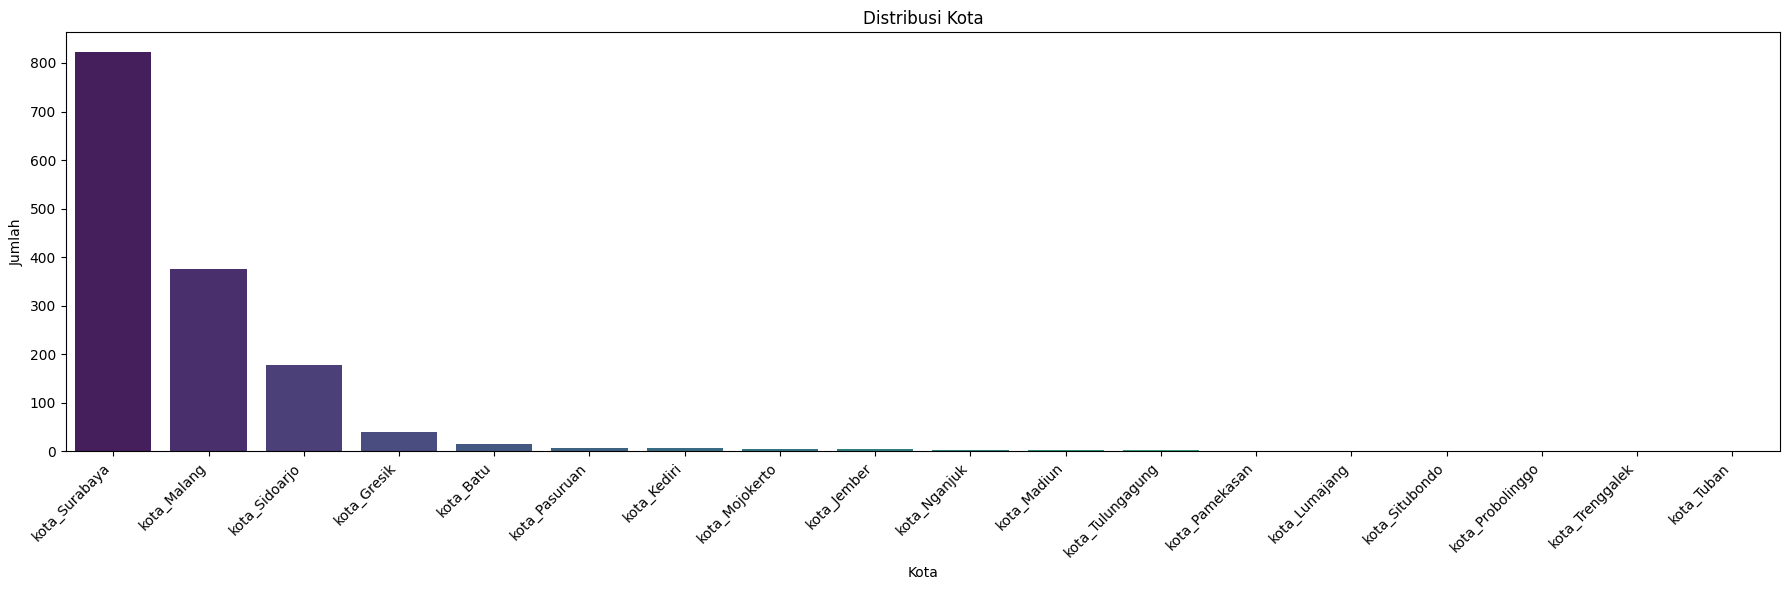

In [40]:
plt.figure(figsize=(18, 6))

kota_cols = [col for col in data.columns if col.startswith('kota_')]
kota_counts = data[kota_cols].sum().sort_values(ascending=False)

sns.barplot(x=kota_counts.index, y=kota_counts.values, palette='viridis', hue=kota_counts.index, legend=False)
plt.title("Distribusi Kota")
plt.xlabel("Kota")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

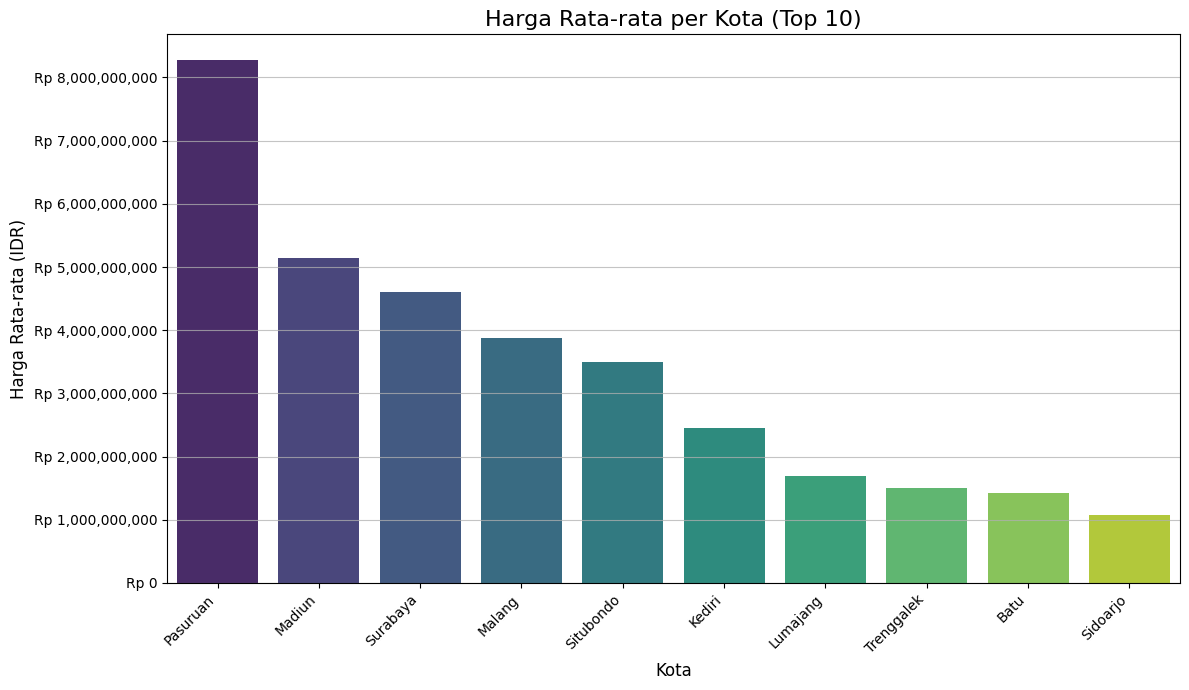

In [41]:
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- EDA Kota: Harga Rata-rata Properti per Kota (Top 10) ---

plt.figure(figsize=(12, 7))

# Identify one-hot encoded city columns (using the `kota_cols` variable from the kernel state)
kota_cols_encoded = [col for col in data.columns if col.startswith('kota_')]

# Create a list to store mean prices for each city
city_mean_prices = []

for col in kota_cols_encoded:
    city_name = col.replace('kota_', '')  # Extract original city name
    # Calculate the mean price for properties in this city
    # Filter rows where this specific city column is 1
    mean_price = data[data[col] == 1]['harga'].mean()
    if not pd.isna(mean_price):
        city_mean_prices.append({'kota': city_name, 'harga': mean_price})

# Convert to DataFrame
mean_price_by_city = pd.DataFrame(city_mean_prices)

# Sort and get the top 10
mean_price_by_city = mean_price_by_city.sort_values(by='harga', ascending=False).head(10).reset_index(drop=True)

sns.barplot(x='kota', y='harga', data=mean_price_by_city, palette='viridis', hue='kota', legend=False)
plt.title('Harga Rata-rata per Kota (Top 10)', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Harga Rata-rata (IDR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'Rp {int(x):,}'))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

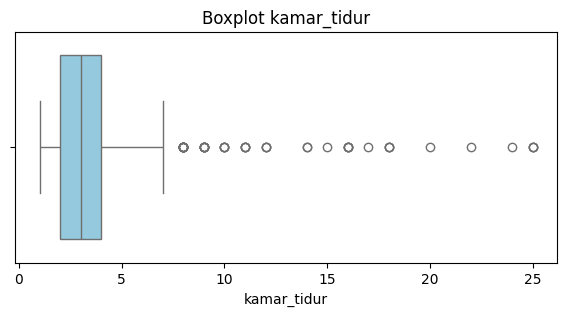

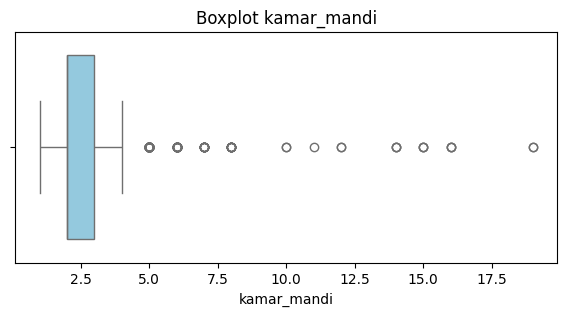

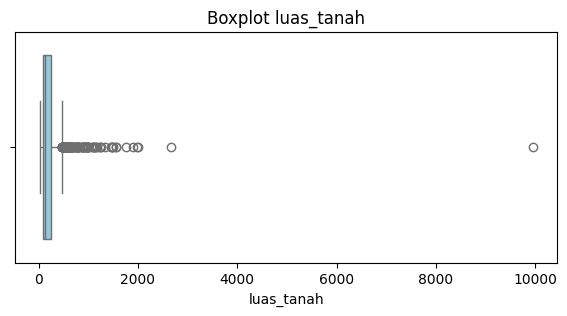

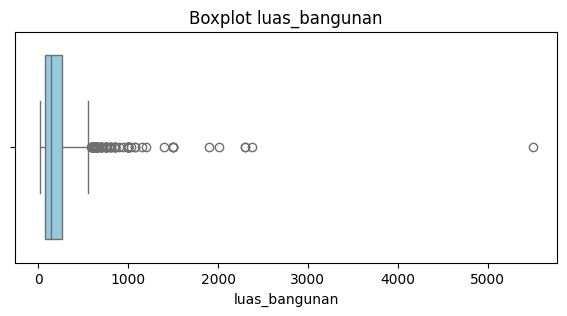

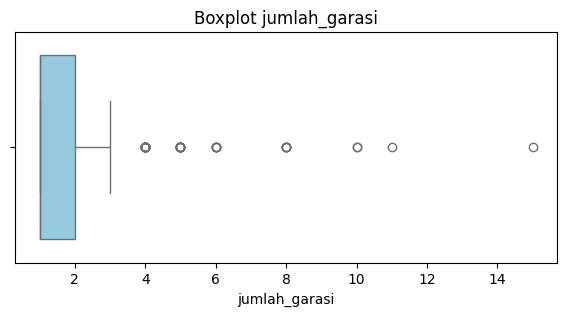

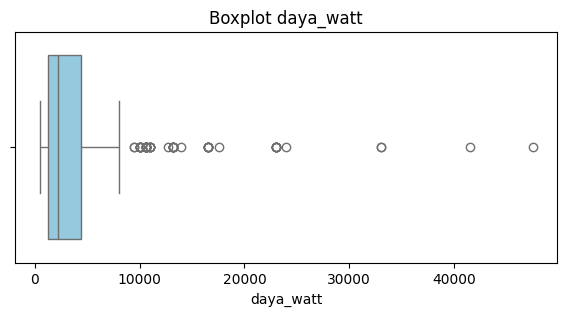

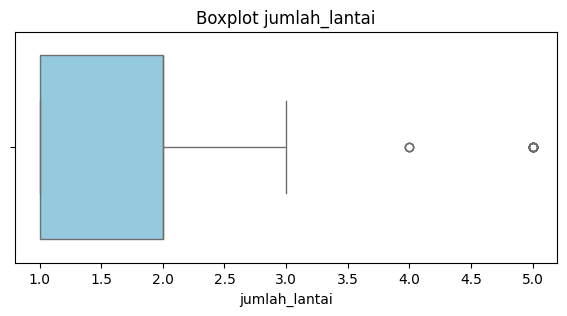

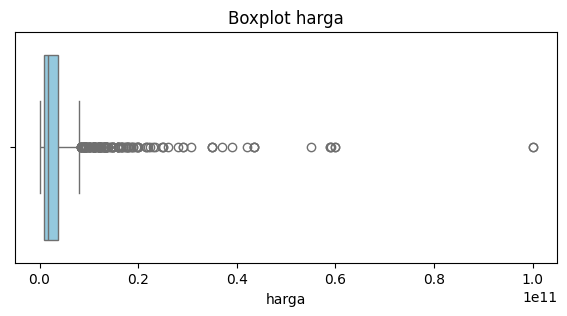

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang ada di dataset kamu
numeric_cols = [
    "kamar_tidur",
    "kamar_mandi",
    "luas_tanah",
    "luas_bangunan",
    "jumlah_garasi",
    "daya_watt",
    "jumlah_lantai",
    "harga"
]

# Loop untuk membuat boxplot setiap kolom
for col in numeric_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot {col}", fontsize=12)
    plt.xlabel(col)
    plt.show()


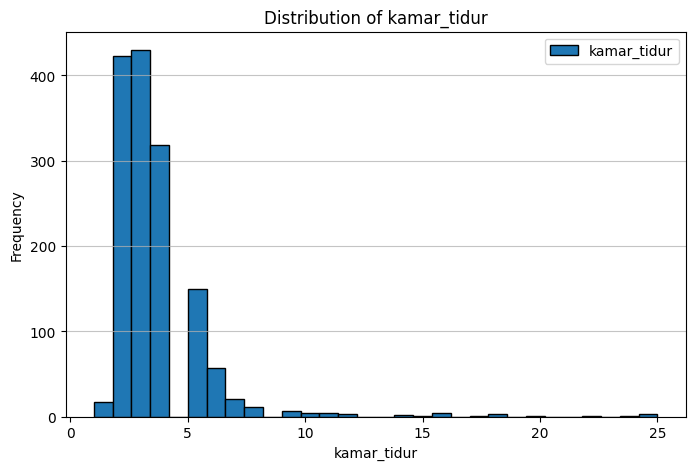

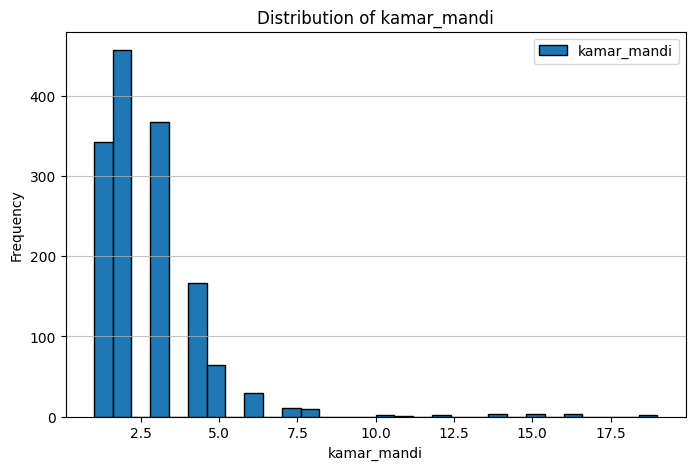

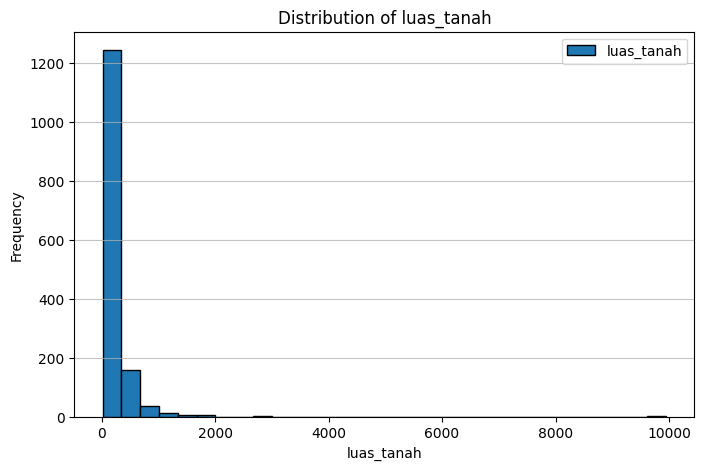

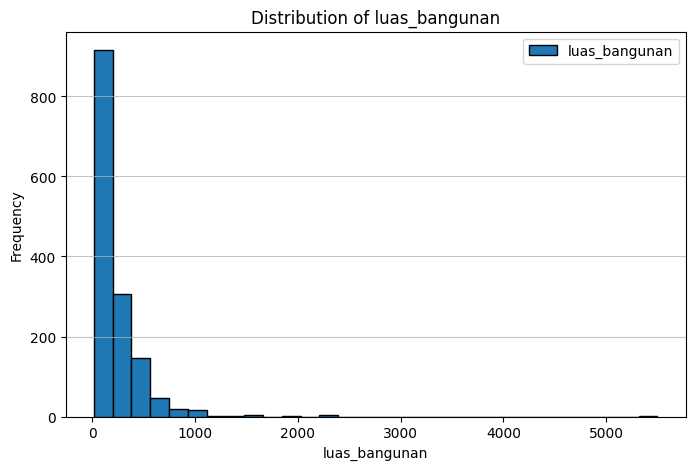

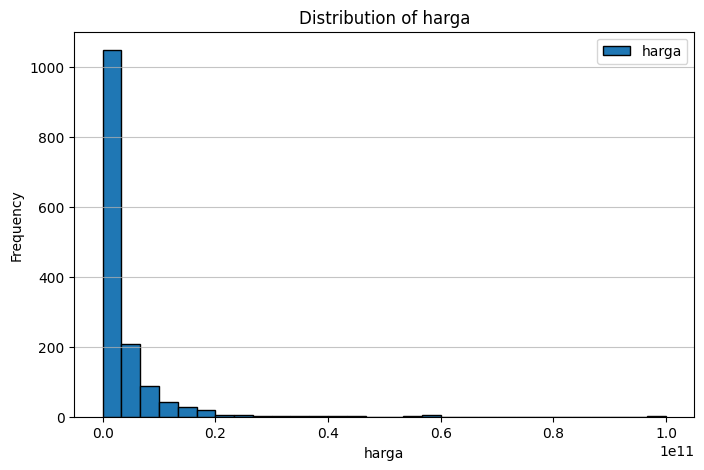

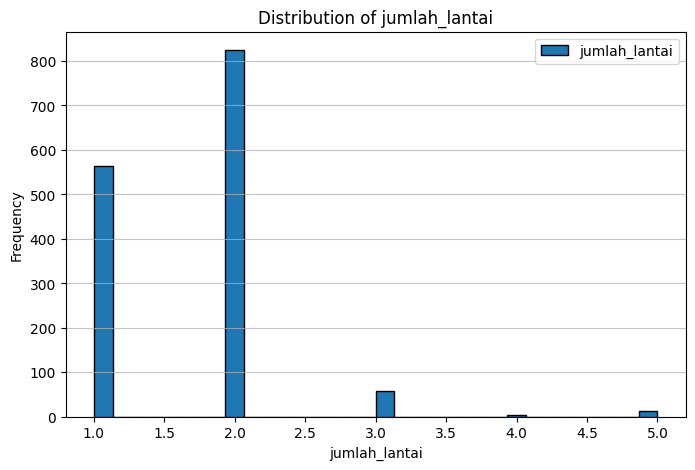

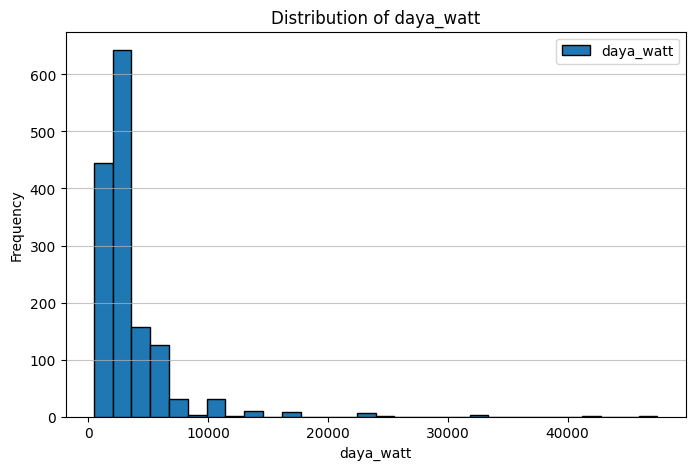

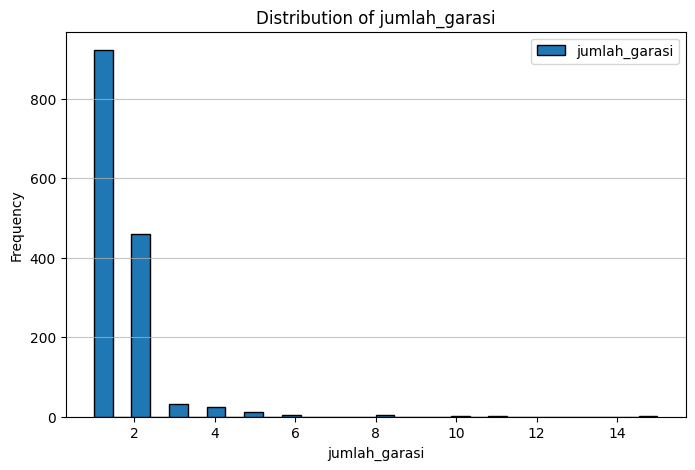

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["kamar_tidur", "kamar_mandi", "luas_tanah", "luas_bangunan", "harga", "jumlah_lantai", "daya_watt", "jumlah_garasi"]

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=30, edgecolor='black', label=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

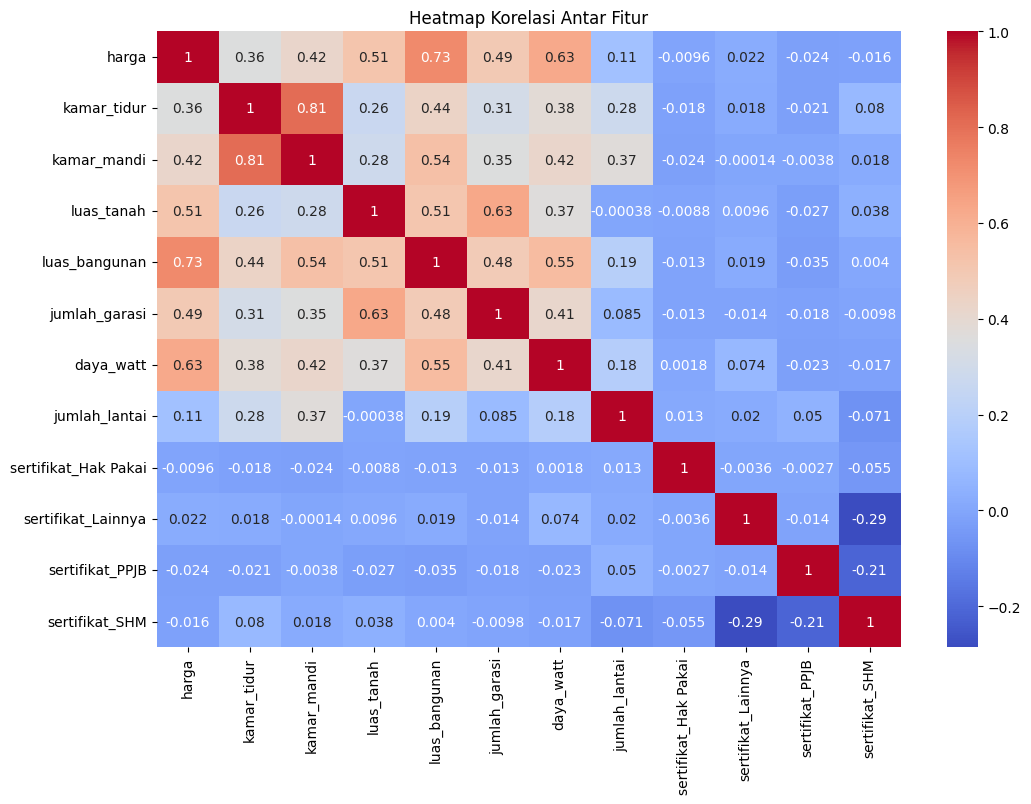

In [44]:
plt.figure(figsize=(12,8))

data["harga"] = pd.to_numeric(data["harga"], errors='coerce')
data["harga"] = data["harga"].fillna(data["harga"].median()).astype(int)

sns.heatmap(data[["harga","kamar_tidur","kamar_mandi","luas_tanah","luas_bangunan",
                  "jumlah_garasi", "daya_watt", "jumlah_lantai",
                  "sertifikat_Hak Pakai", "sertifikat_Lainnya",
                  "sertifikat_PPJB", "sertifikat_SHM"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

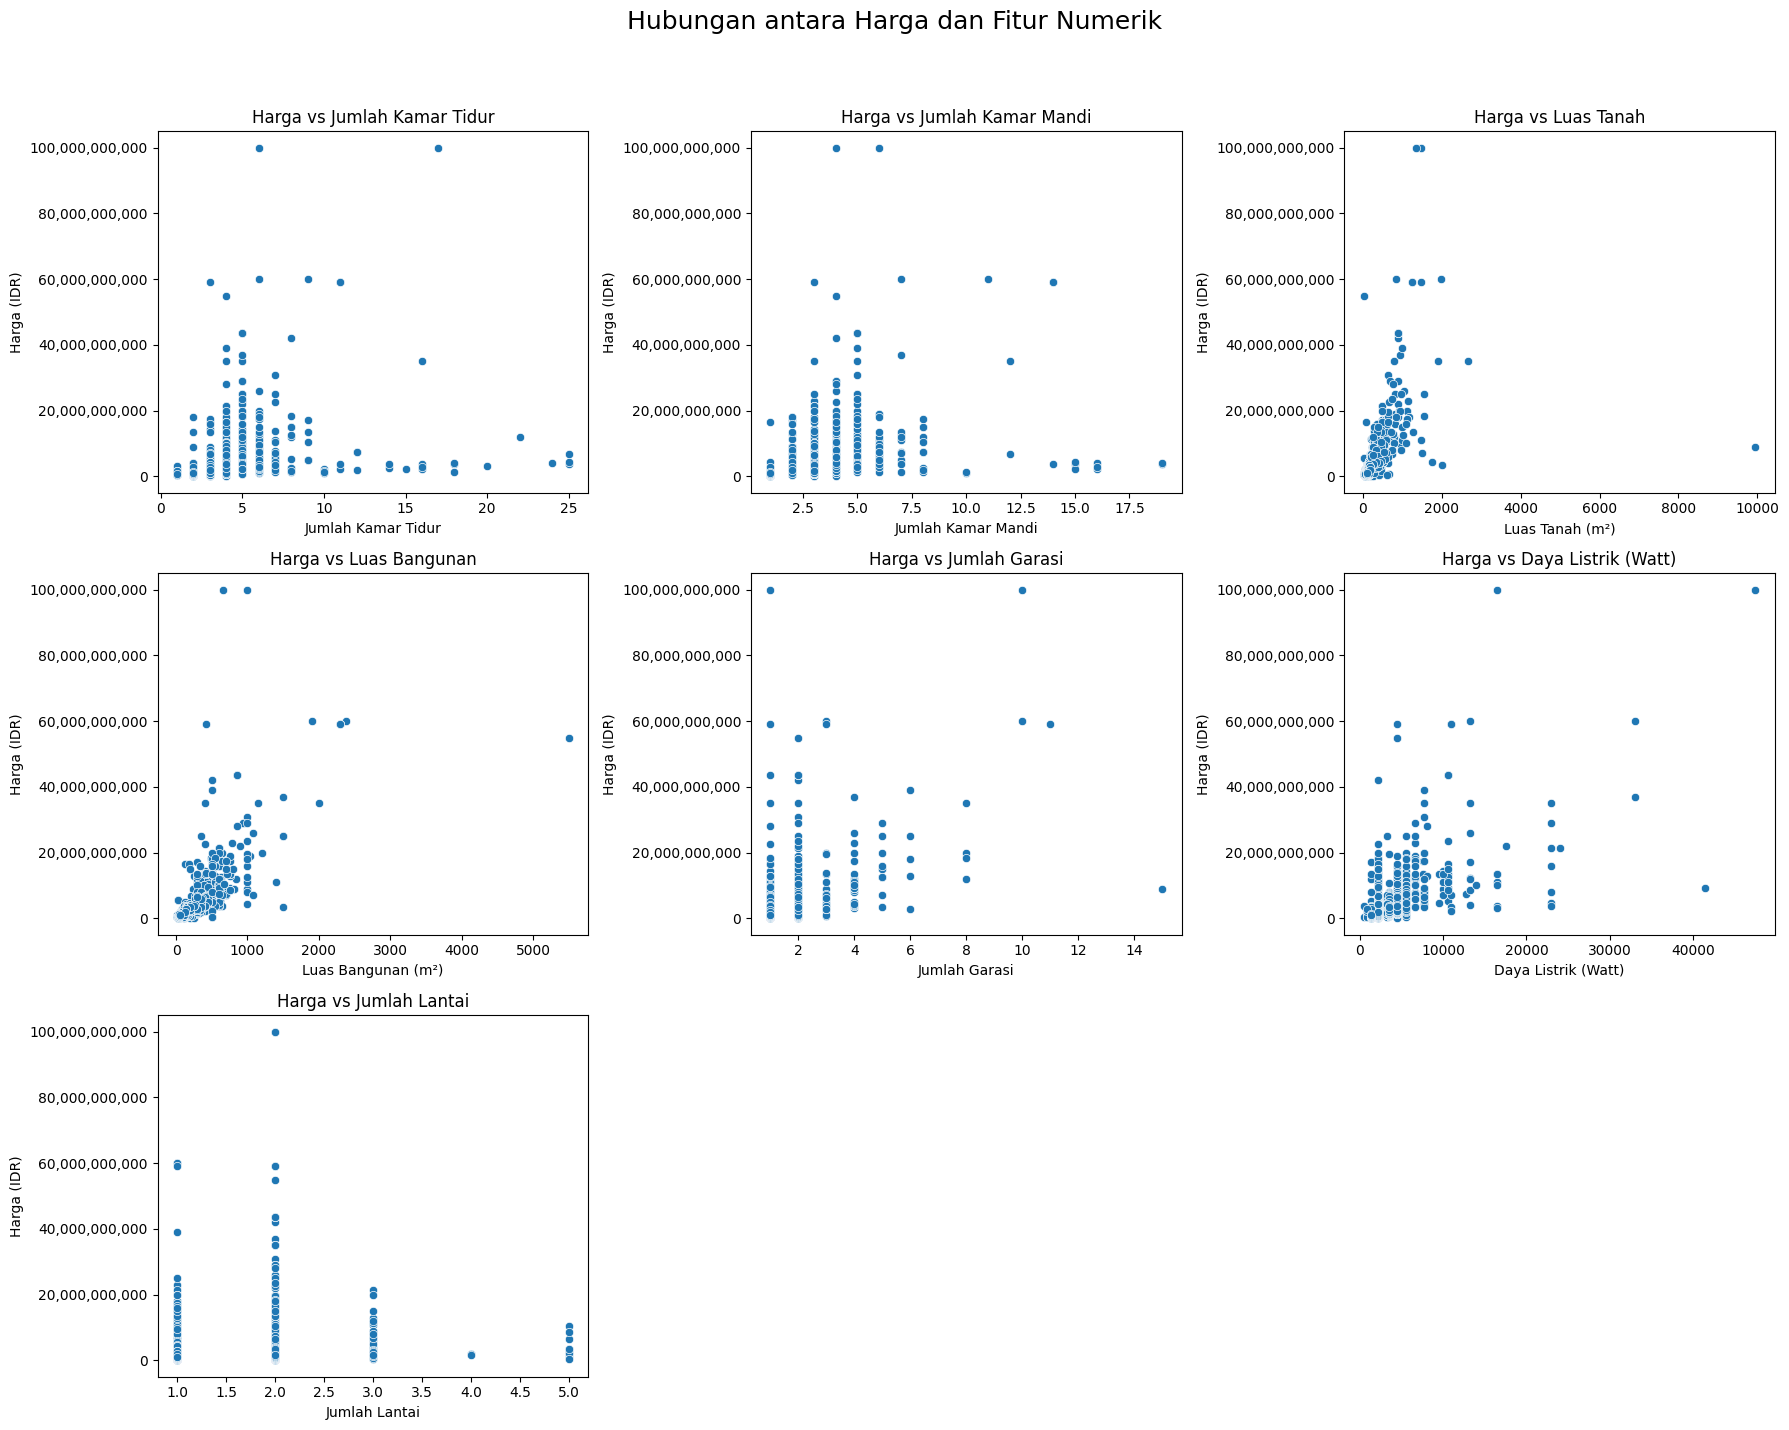

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Hubungan antara Harga dan Fitur Numerik', fontsize=18)

# Formatter untuk harga dalam Rupiah
def format_rupiah(x, pos):
    return f"{int(x):,}"

# ROW 1
sns.scatterplot(x='kamar_tidur', y='harga', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Harga vs Jumlah Kamar Tidur')
axes[0, 0].set_xlabel('Jumlah Kamar Tidur')
axes[0, 0].set_ylabel('Harga (IDR)')

sns.scatterplot(x='kamar_mandi', y='harga', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Harga vs Jumlah Kamar Mandi')
axes[0, 1].set_xlabel('Jumlah Kamar Mandi')
axes[0, 1].set_ylabel('Harga (IDR)')

sns.scatterplot(x='luas_tanah', y='harga', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Harga vs Luas Tanah')
axes[0, 2].set_xlabel('Luas Tanah (m²)')
axes[0, 2].set_ylabel('Harga (IDR)')


# ROW 2
sns.scatterplot(x='luas_bangunan', y='harga', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Harga vs Luas Bangunan')
axes[1, 0].set_xlabel('Luas Bangunan (m²)')
axes[1, 0].set_ylabel('Harga (IDR)')

sns.scatterplot(x='jumlah_garasi', y='harga', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Harga vs Jumlah Garasi')
axes[1, 1].set_xlabel('Jumlah Garasi')
axes[1, 1].set_ylabel('Harga (IDR)')

sns.scatterplot(x='daya_watt', y='harga', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Harga vs Daya Listrik (Watt)')
axes[1, 2].set_xlabel('Daya Listrik (Watt)')
axes[1, 2].set_ylabel('Harga (IDR)')


# ROW 3
sns.scatterplot(x='jumlah_lantai', y='harga', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Harga vs Jumlah Lantai')
axes[2, 0].set_xlabel('Jumlah Lantai')
axes[2, 0].set_ylabel('Harga (IDR)')

# Kosongkan dua plot terakhir agar layout tetap 3×3
axes[2, 1].axis('off')
axes[2, 2].axis('off')


# PASANG FORMAT RUPIAH KE SEMUA AXIS
for row in axes:
    for ax in row:
        try:
            ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_rupiah))
        except:
            pass

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
data.to_csv('data_processed.csv', index=False)
print('DataFrame berhasil disimpan sebagai data_processed.csv')

DataFrame berhasil disimpan sebagai data_processed.csv


## **Import Library Evaluasi & Model**

In [47]:
# Import Library Evaluasi & Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


## **Menentukan Feature & Target**

In [48]:
# Target kolom: harga
y = data['harga']

# Fitur: semua kolom kecuali harga
X = data.drop(columns=['harga', 'judul', 'lokasi'])


# **Train-Test Split**

In [49]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1170, 29)
X_test: (293, 29)
y_train: (1170,)
y_test: (293,)


## **Deklarasi Fungsi evaluasi untuk semua model**

In [50]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    return {
        "MAE": f"{mae:.2f}",
        "MSE": f"{mse:.2f}",
        "RMSE": f"{rmse:.2f}",
        "MAPE (%)": f"{mape:.2f}",
        "R²": f"{r2:.2f}"
    }

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing pipeline
preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())   # opsional, tapi baik untuk Linear & Boosting
])


In [52]:
# Inisialisasi model
model_lr = Pipeline(steps=[
    ('prep', preprocess),
    ('model', LinearRegression())
])

# Training model
model_lr.fit(X_train, y_train)

# Prediksi
pred_lr = model_lr.predict(X_test)

# Evaluasi
result_lr = evaluate_model(y_test, pred_lr)

print("=== Linear Regression Result ===")
result_lr


=== Linear Regression Result ===


{'MAE': '1468143924.86',
 'MSE': '7849448409532157952.00',
 'RMSE': '2801686707.96',
 'MAPE (%)': '80.33',
 'R²': '0.53'}

In [53]:
# Inisialisasi model
model_rf = Pipeline(steps=[
    ('prep', preprocess),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

# Training model
model_rf.fit(X_train, y_train)

# Prediksi
pred_rf = model_rf.predict(X_test)

# Evaluasi
result_rf = evaluate_model(y_test, pred_rf)

print("=== Random Forest Result ===")
result_rf

=== Random Forest Result ===


{'MAE': '1039376917.05',
 'MSE': '6281687314841659392.00',
 'RMSE': '2506329450.58',
 'MAPE (%)': '39.85',
 'R²': '0.62'}

In [54]:
# Inisialisasi model
model_gb = Pipeline(steps=[
    ('prep', preprocess),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ))
])

# Training model
model_gb.fit(X_train, y_train)

# Prediksi
pred_gb = model_gb.predict(X_test)

# Evaluasi
result_gb = evaluate_model(y_test, pred_gb)

print("=== Gradient Boosting Result ===")
result_gb


=== Gradient Boosting Result ===


{'MAE': '976651169.44',
 'MSE': '5701389875791951872.00',
 'RMSE': '2387758336.97',
 'MAPE (%)': '37.73',
 'R²': '0.66'}

In [55]:
# Inisialisasi model
model_xgb = Pipeline(steps=[
    ('prep', preprocess),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        random_state=42
    ))
])

# Training model
model_xgb.fit(X_train, y_train)

# Prediction
pred_xgb = model_xgb.predict(X_test)

# Evaluasi
result_xgb = evaluate_model(y_test, pred_xgb)

print("=== XGBoost Result ===")
result_xgb

=== XGBoost Result ===


{'MAE': '917773056.00',
 'MSE': '4834409141063647232.00',
 'RMSE': '2198728983.09',
 'MAPE (%)': '36.87',
 'R²': '0.71'}

In [56]:
pd.DataFrame({
    "Linear Regression": result_lr,
    "Random Forest": result_rf,
    "XGBoost": result_xgb,
    "Gradient Boosting": result_gb
})


,Linear Regression,Random Forest,XGBoost,Gradient Boosting
MAE,1468143924.86,1039376917.05,917773056.00,976651169.44
MSE,7849448409532157952.00,6281687314841659392.00,4834409141063647232.00,5701389875791951872.00
RMSE,2801686707.96,2506329450.58,2198728983.09,2387758336.97
MAPE (%),80.33,39.85,36.87,37.73
R²,0.53,0.62,0.71,0.66


In [57]:
import joblib

joblib.dump(model_xgb, "model_prediksi_xgboost.sav")
print("Model berhasil disimpan!")


Model berhasil disimpan!


In [58]:
import pickle

In [59]:
filename ='model_prediksi_harga_xgboost.sav'
pickle.dump(model_xgb, open(filename, 'wb'))